# Linear Regression 

### Model Equation 

`f(x) = w*x + b`  or  `f_x = w*x + b`

In [51]:
from matplotlib import pyplot as plt
import numpy as np

### Simply Plot Function `f(x)` output and observe pattern
- When w=0, You see a straight horizontal line
- When b=0, You see a straight exponential line
- When w=x, b=x You see a straight exponential line and y-intercept = b

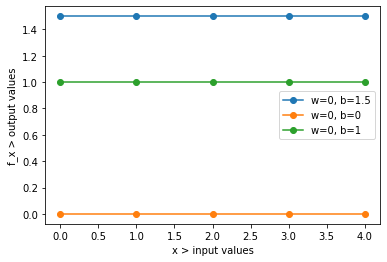

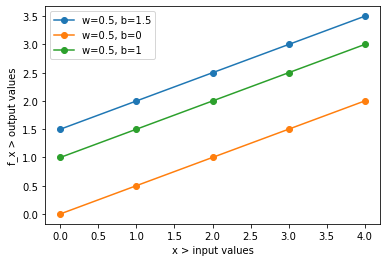

In [52]:
x = [0, 1, 2, 3, 4]

w = [0, 0.5]
b = [1.5, 0, 1]

for w_i in w:
    for b_i in b:
        y_predicted = []
        for x_i in x:
            f_x = w_i * x_i + b_i
            y_predicted.append(f_x)

        label = f"w={str(w_i)}, b={str(b_i)}"
        plt.plot(x, y_predicted, "-o", label=label)
        plt.xlabel("x > input values")
        plt.ylabel("f_x > output values")
        plt.legend()
    plt.show()

# 1. Model Representation
### i) Key Objective
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

#### ii) Problem Statement (Housing Price Prediction)

This lab will use a simple data set with only two data points 
- a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. 
- These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like to fit a linear regression model through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.


In [53]:
x_train = np.array([1,2])
y_train = np.array([300, 500])
print(f"x_train: {x_train} \t\t>> Shape: {x_train.shape}")
print(f"y_train: {y_train} \t>> Shape: {y_train.shape}")

x_train: [1 2] 		>> Shape: (2,)
y_train: [300 500] 	>> Shape: (2,)


In [54]:
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

for i in range(m):
    print(f"(x^({i}), y^({i})) = ({x_train[i]}, {y_train[i]})")

Number of training examples is: 2
(x^(0), y^(0)) = (1, 300)
(x^(1), y^(1)) = (2, 500)


Linear Regression Function

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

Suppose w = 100 ; b = 100

Let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

In [55]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model predictions
    """
    m = x.shape[0]
    f_wb = np.zeros(m)  # See eq. 1 >> that's why called model output f_wb

    for i in range(m):
        f_wb[i] = w*x[i] + b
    
    return f_wb

Now let's call the `compute_model_output` function and plot the output..

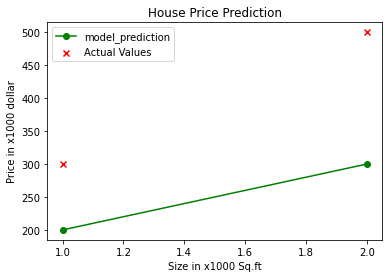

In [56]:
w,b = 100, 100
x_train = np.array([1,2])
y_train = np.array([300, 500])

f_wb = compute_model_output(x_train, w, b)

# Plot Model Prediction
plt.plot(x_train, f_wb, "-o", label="model_prediction", color='g')
# Plot Actual Data Points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Plot Styling
plt.legend()
plt.xlabel("Size in x1000 Sq.ft")
plt.ylabel("Price in x1000 dollar")
plt.title("House Price Prediction")
plt.show()

### iii) Prediction
Let's predict the price of a house with 1200 sqft. 
- Since the units of $x$ are in 1000's of sqft, $x$ is 1.2.

In [57]:
w,b = 200, 100
x_test = np.array([1.2])
f_wb = compute_model_output(x_test, w, b)

print(f_wb)

[340.]


# 2. Cost Function
### i) Key Objective
- you will implement and explore the `cost` function for linear regression with one variable. 

#### ii) Problem Statement (Housing Price Prediction)

Same data set previously used: 
- a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. 
- These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like a model which can predict housing prices given the size of the house.


In [58]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0]) 

### ii) Computing Cost
The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.


In [59]:
def compute_cost(x, y, w, b):
    ''' 
    Key pupose of this function is calculate and return total_cost (mse)
    '''
    m = x.shape[0]
    total_cost = 0
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
        cost = (f_wb[i] - y[i])**2
        total_cost += cost
    
    mse = total_cost/(2*m)
    return mse, f_wb

[50000.0, 12500.0, 0.0, 12500.0, 50000.0]
[array([100., 100.]), array([200., 300.]), array([300., 500.]), array([400., 700.]), array([500., 900.])]


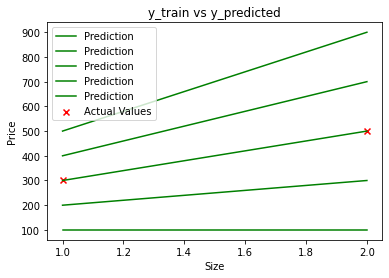

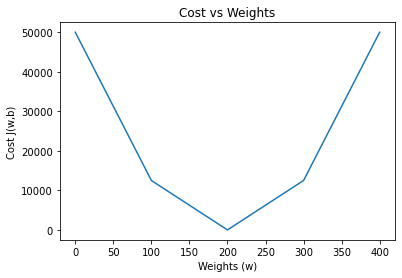

In [60]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0]) 


w = [0,100,200,300,400]
b = 100

errors = []
predicion = []
for w_i in w:
    mse, f_wb = compute_cost(x_train, y_train, w_i,b)
    errors.append(mse)
    predicion.append(f_wb)

print(errors) # [50000.0, 12500.0, 0.0, 12500.0, 50000.0]
print(predicion) # [array([100., 100.]), array([200., 300.]), array([300., 500.]), array([400., 700.]), array([500., 900.])]

# Plot the Results >> 
# y_train vs y_predicted
for y_predicted in predicion:
    plt.plot(x_train, y_predicted, "-", c="g", label="Prediction")

plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")
plt.legend()
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("y_train vs y_predicted")
plt.show()


# Cost vs weights
plt.plot(w,errors)
plt.xlabel("Weights (w)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Weights")
plt.show()


In [61]:
# Now caluclate cost for the following dataset
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [62]:
def do_the_magic(x_train, y_train):
    errors = []
    predicion = []
    for w_i in w:
        mse, f_wb = compute_cost(x_train, y_train, w_i,b)
        errors.append(mse)
        predicion.append(f_wb)

    print(errors, "\n", predicion)
    # y_train vs y_predicted
    for y_predicted in predicion:
        plt.plot(x_train, y_predicted, "-", c="g", label="Prediction")
    plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")
    plt.legend()
    plt.xlabel("Size")
    plt.ylabel("Price")
    plt.title("y_train vs y_predicted")
    plt.show()
    # Cost vs weights
    plt.plot(w,errors)
    plt.xlabel("Weights (w)")
    plt.ylabel("Cost J(w,b)")
    plt.title("Cost vs Weights")
    plt.show()

[82800.0, 15933.333333333334, 4700.0, 49100.0, 149133.33333333334] 
 [array([100., 100., 100., 100., 100., 100.]), array([200., 270., 300., 350., 400., 420.]), array([300., 440., 500., 600., 700., 740.]), array([ 400.,  610.,  700.,  850., 1000., 1060.]), array([ 500.,  780.,  900., 1100., 1300., 1380.])]


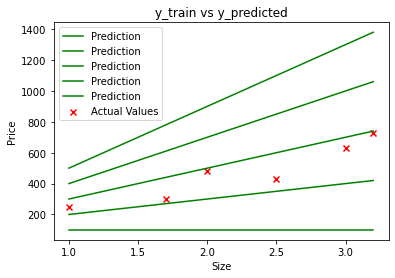

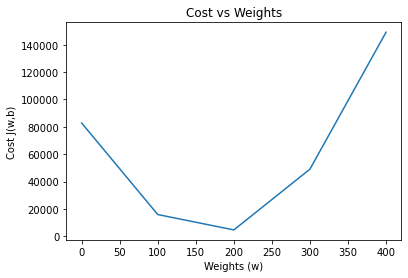

In [63]:
do_the_magic(x_train, y_train)

[1665000.0, 4320498333.333333, 17622665000.0, 39908165000.0, 71176998333.33333] 
 [array([100., 100., 100., 100., 100., 100.]), array([ 20100.,  30100.,  50100.,  10100., 200100., 100100.]), array([ 40100.,  60100., 100100.,  20100., 400100., 200100.]), array([ 60100.,  90100., 150100.,  30100., 600100., 300100.]), array([ 80100., 120100., 200100.,  40100., 800100., 400100.])]


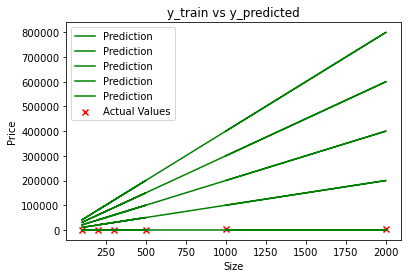

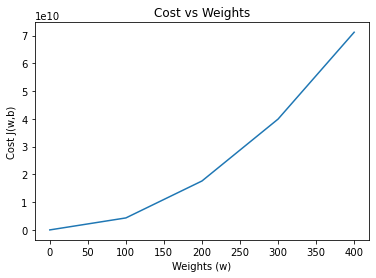

In [64]:
# Creating a dummy dataset
x = np.array([200, 300, 500, 100, 2000, 1000]) # input values
y = [400, 600, 1000, 200, 4000, 2000] # output values

do_the_magic(x,y)

# 3. Gradient Descent for Linear Regression
### i) Key Objective
- you will implement and explore how to automate the process of optimizing  `𝑤`  and  `𝑏`  using gradient descent.

#### ii) Problem Statement (Housing Price Prediction)

Same data set previously used: 
- a house with 1000 square feet(sqft) sold for \\$300,000 and a house with 2000 square feet sold for \\$500,000. 
- These two points will constitute our *data or training set*. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |

You would like a model which can predict housing prices given the size of the house.


In [65]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#### iii) Compute Cost

In [66]:
# Compute Cost Function

def compute_cost(x, y, w, b):
    ''' 
    Key pupose of this function is calculate and return total_cost (mse)
    '''
    m = x.shape[0] # rows
    total_cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = ((f_wb - y[i])**2)
        total_cost += cost
    mse = total_cost/(2*m)
    return mse


#### iv) Gradient Descent

In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
#### iv) Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
#### v) compute_gradient

<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. 

The embedded comments describe the operations.

In [67]:
def compute_gradient(x, y, w, b): 
  """
  Computes & return gradient for linear regression, where gradient means dj_dw, dj_db
  Args:
    x (ndarray (m,)): Data, m examples 
    y (ndarray (m,)): target values
    w,b (scalar)    : model parameters  
  Returns
    dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
  m = x.shape[0]
  f_wb = np.zeros(m)
  dj_dw, dj_db = 0,0

  for i in range(m):
    f_wb[i] = w * x[i] + b
    dj_dw += (f_wb[i] - y[i]) * x[i]
    dj_db += (f_wb[i] - y[i])
  dj_db = dj_db/m
  dj_dw = dj_dw/m
  
  return dj_dw, dj_db


In [68]:
def gradient_descent(x, y, w, b, lr, iterations):
  steps = iterations // 10
  j_history = [] # cost 
  p_history = [] # Parameters
  for i in range(iterations):
    cost = compute_cost(x,y,w,b) # compute cost after ith step
    dj_dw, dj_db = compute_gradient(x,y,w,b)
    temp_w = w - lr * dj_dw
    temp_b = b - lr * dj_db
    w,b = temp_w, temp_b
    
    j_history.append(cost)
    p_history.append([w,b])
    if (i % steps) == 0:
      # cost = compute_cost(x,y,w,b)
      print(f"iterations: {i}; cost:{cost}, w:{w}; b:{b}")

  return w, b, j_history, p_history


In [69]:
w, b = 0, 0
lr = 0.001
w_final, b_final, j_history, p_history = gradient_descent(x_train, y_train, w, b, lr, iterations=100000)

iterations: 0; cost:85000.0, w:0.65; b:0.4
iterations: 10000; cost:3.4191332162844623, w:194.9102636831083; b:108.23536635450496
iterations: 20000; cost:0.7948145338800934, w:197.5460247829589; b:103.97061530872239
iterations: 30000; cost:0.18476324357833707, w:198.81683568835072; b:101.91440007052482
iterations: 40000; cost:0.04295021633652789, w:199.429546892471; b:100.92301251697015
iterations: 50000; cost:0.009984242794341349, w:199.72496064605264; b:100.44502302293085
iterations: 60000; cost:0.002320945333434428, w:199.86739199905935; b:100.21456425270212
iterations: 70000; cost:0.0005395288708197124, w:199.93606412442023; b:100.10345041978856
iterations: 80000; cost:0.00012541932731122162, w:199.96917383448118; b:100.0498777835526
iterations: 90000; cost:2.9155080504233984e-05, w:199.98513741351024; b:100.02404817010108


In [70]:
print(w,b)
print(final_w, final_b)

0 0
199.99283360129957 100.01159547667442


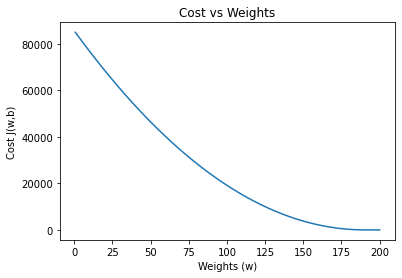

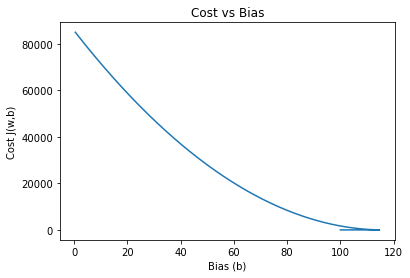

In [71]:
# def plot_curve(x,y, x_labe, y_labe, title):
# Cost vs weights
w, b = [], []
for w_i, b_i in p_history:
    w.append(w_i)
    b.append(b_i)

plt.plot(w, j_history)
plt.xlabel("Weights (w)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Weights")
plt.show()

plt.plot(b, j_history)
plt.xlabel("Bias (b)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs Bias")
plt.show()

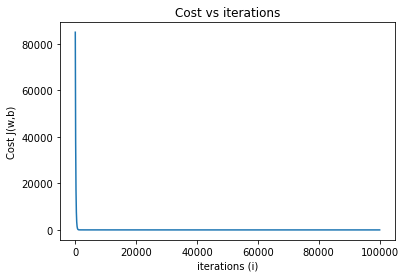

In [72]:
iterations = np.arange(len(j_history))
plt.plot(iterations, j_history)
plt.xlabel("iterations (i)")
plt.ylabel("Cost J(w,b)")
plt.title("Cost vs iterations")
plt.show()


In [73]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


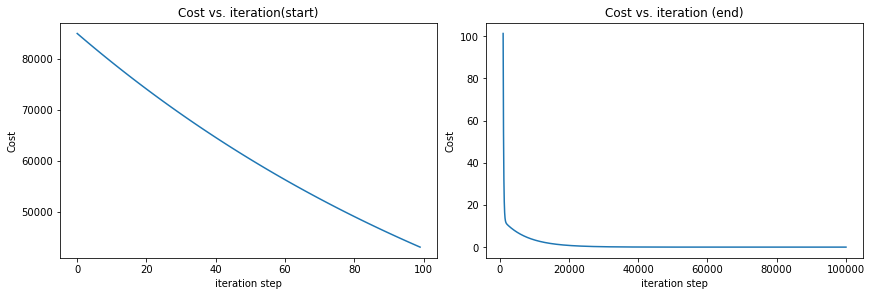

In [74]:
# plot cost versus iteration  
J_hist = j_history
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()